In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("ticks")

# 1.1. Importacao dos dados de cnpj

In [3]:
df_cnpjs = pd.read_csv('cnpjs_bovinos_preprocessados.csv', index_col=[0])
df_cnpjs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194331 entries, 0 to 197809
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tipo_de_registro             194331 non-null  int64  
 1   indicador                    194331 non-null  object 
 2   cnpj                         194331 non-null  int64  
 3   identificador_matriz_filial  194331 non-null  int64  
 4   razao_social                 194331 non-null  object 
 5   situacao_cadastral           194331 non-null  int64  
 6   data_situacao_cadastral      194331 non-null  object 
 7   motivo_situacao_cadastral    194331 non-null  int64  
 8   codigo_natureza_juridica     194331 non-null  int64  
 9   data_inicio_atividade        194331 non-null  object 
 10  cnae_fiscal                  194331 non-null  int64  
 11  uf                           194331 non-null  object 
 12  qualificacao_responsavel     194331 non-null  int64  
 13 

In [4]:
df_cnpjs['data_situacao_cadastral'] = pd.to_datetime(df_cnpjs['data_situacao_cadastral'])
df_cnpjs['data_inicio_atividade'] = pd.to_datetime(df_cnpjs['data_inicio_atividade'])
df_cnpjs['ano_abertura'] = pd.DatetimeIndex(df_cnpjs['data_inicio_atividade']).year
df_cnpjs['mes_abertura'] = pd.DatetimeIndex(df_cnpjs['data_inicio_atividade']).month
df_cnpjs['ano_situacao'] = pd.DatetimeIndex(df_cnpjs['data_situacao_cadastral']).year
df_cnpjs['mes_situacao'] = pd.DatetimeIndex(df_cnpjs['data_situacao_cadastral']).month

df_cnpjs[['ano_abertura', 'mes_abertura', 'ano_situacao', 'mes_situacao']]

,ano_abertura,mes_abertura,ano_situacao,mes_situacao
0,1997,12,2000,9
1,1998,5,1998,8
3,1994,5,1994,5
4,1983,6,2005,11
5,1994,5,2005,11
...,...,...,...,...
197805,1966,9,2018,10
197806,1966,9,2018,10
197807,1966,8,2005,11
197808,1971,7,2000,8


In [5]:
df_cnpjs['cnae_fiscal'].unique()

array([1011201,  151201])

In [6]:
cod_bovino_corte = 151201
cod_bovino_frigorifico = 1011201

# 1.1.2. Criação de datasets referentes ao cnpj

In [7]:
def define_presidente(ano, mes):
    presidentes = ['FHC', 'Lula', 'Dilma', 'Temer', 'Bolsonaro']
    if(ano < 2003):
        return presidentes[0]
    elif(ano < 2011):
        return presidentes[1]
    elif(ano < 2016 or (ano < 2017 and mes < 9)):
        return presidentes[2]
    elif(ano < 2019):
        return presidentes[3]
    else:
        return presidentes[4]

In [8]:
df_cnpjs_inativos = df_cnpjs[df_cnpjs['situacao_atividade'] == 'INATIVA']
df_cnpjs_inativos['nm_cnae'].value_counts()

Criação de bovinos para corte     38455
Frigorífico - abate de bovinos     4674
Name: nm_cnae, dtype: int64

In [9]:
df_cnpjs_ativos = df_cnpjs[df_cnpjs['situacao_atividade'] == 'ATIVA']
df_cnpjs_ativos['nm_cnae'].value_counts()

Criação de bovinos para corte     148672
Frigorífico - abate de bovinos      2530
Name: nm_cnae, dtype: int64

In [10]:
df_cnpjs_abertura = df_cnpjs[df_cnpjs['ano_abertura'] > 1996]
df_cnpjs_abertura['presidente'] = df_cnpjs_abertura.apply(lambda row: define_presidente(row['ano_abertura'], row['mes_abertura']), axis=1)
df_cnpjs_abertura['presidente'].value_counts()

<ipython-input-10-7fd394ab817a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cnpjs_abertura['presidente'] = df_cnpjs_abertura.apply(lambda row: define_presidente(row['ano_abertura'], row['mes_abertura']), axis=1)


Lula         106743
Dilma         43239
Temer         15200
Bolsonaro     10691
FHC            2934
Name: presidente, dtype: int64

In [11]:
df_cnpjs_inativos_pres  = df_cnpjs_inativos[df_cnpjs_inativos['ano_situacao'] > 1996]
df_cnpjs_inativos_pres['presidente'] = df_cnpjs_inativos_pres.apply(lambda row: define_presidente(row['ano_situacao'], row['mes_abertura']), axis=1)
df_cnpjs_inativos_pres['presidente'].value_counts()

<ipython-input-11-11b585c29839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cnpjs_inativos_pres['presidente'] = df_cnpjs_inativos_pres.apply(lambda row: define_presidente(row['ano_situacao'], row['mes_abertura']), axis=1)


Dilma        14639
Lula         12666
Temer         6179
Bolsonaro     3969
FHC           2332
Name: presidente, dtype: int64

# 1.2. Importacao de dados de exportacoes

In [12]:
df_exportacoes = pd.read_csv('exp_bovinos.csv', index_col=[0])
df_exportacoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149663 entries, 355 to 15801996
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CO_ANO      149663 non-null  int64 
 1   CO_MES      149663 non-null  int64 
 2   SH4         149663 non-null  int64 
 3   CO_PAIS     149663 non-null  int64 
 4   SG_UF_MUN   149663 non-null  object
 5   KG_LIQUIDO  149663 non-null  int64 
 6   VL_FOB      149663 non-null  int64 
 7   NO_SH4_POR  149663 non-null  object
 8   NO_PAIS     149663 non-null  object
dtypes: int64(6), object(3)
memory usage: 11.4+ MB


df_cnpjs_inativos_pres  = df_cnpjs_inativos[df_cnpjs_inativos['ano_situacao'] > 1996]
df_cnpjs_inativos_pres['presidente'] = df_cnpjs_inativos_pres.apply(lambda row: define_presidente(row['ano_situacao'], row['mes_abertura']), axis=1)
df_cnpjs_inativos_pres['presidente'].value_counts()## 1.2.1 adicao coluna presidentes

# 2. Analise exportacoes

In [13]:
df_exportacoes['presidente'] = df_exportacoes.apply(lambda row: define_presidente(row['CO_ANO'], row['CO_MES']), axis=1)
df_exportacoes['presidente'].value_counts()

Lula         56064
Dilma        37736
Bolsonaro    19633
Temer        19498
FHC          16732
Name: presidente, dtype: int64

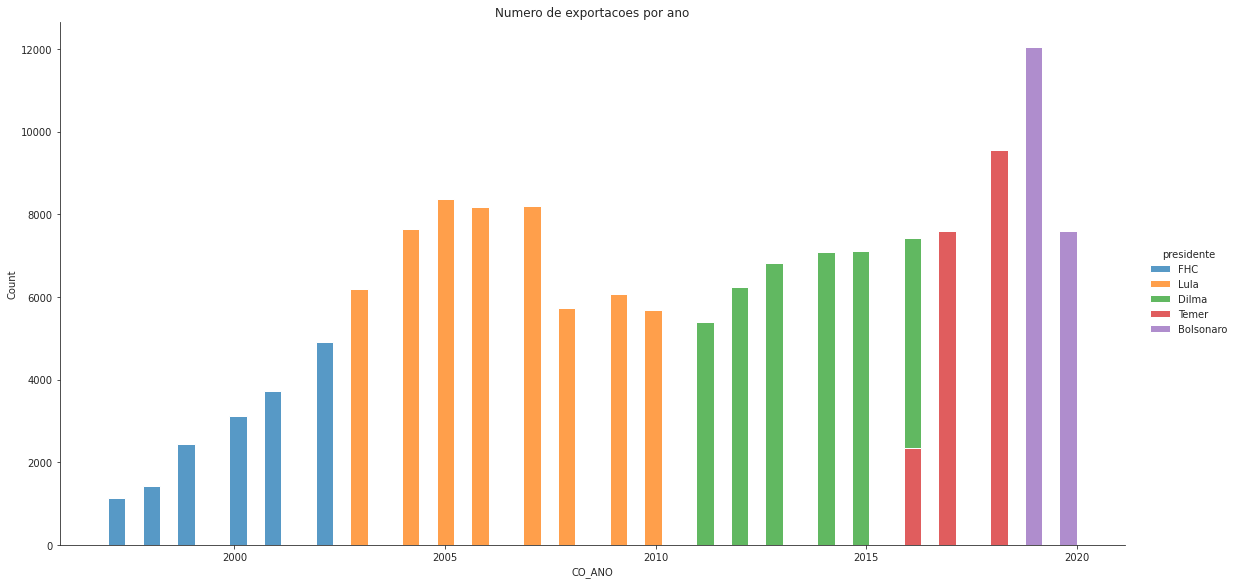

In [14]:
ax = sns.displot(data=df_exportacoes, x='CO_ANO', hue='presidente', multiple="stack",  height=8, aspect=2)
_ = plt.title('Numero de exportacoes por ano')

As exportacoes cresceram ate 2004 onde estabilizou. Diminuiram em 2008 e se estabilizaram tendo uma leve alta em 2011. Em 2018 houve um aumento expressivo.
2019 foi o ano com mais exporacao de carne bovina.

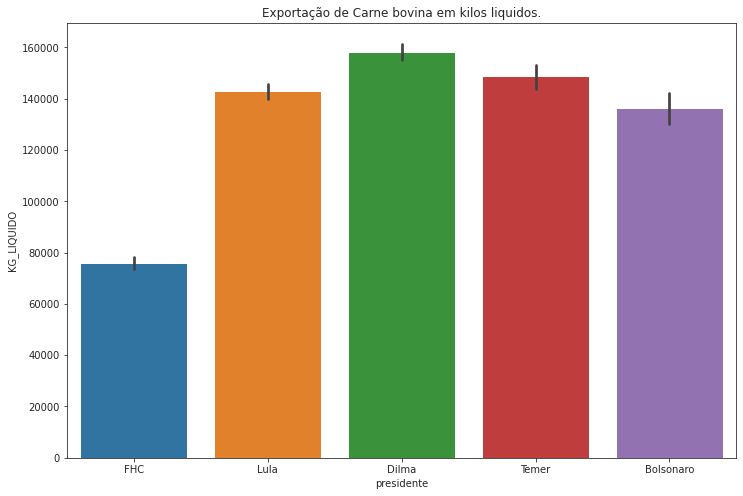

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
_ = sns.barplot(data=df_exportacoes, x='presidente', y='KG_LIQUIDO', ax=ax)
_ = ax.set_title('Exportação de Carne bovina em kilos liquidos.')

Em relação ao peso liquido das exportações bolsonaro em menos de dois anos de governo já se aproxima de Dilma.

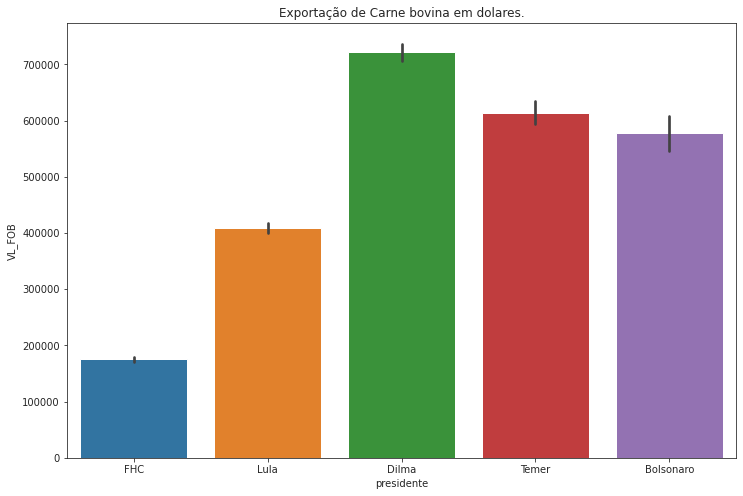

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
_ = sns.barplot(data=df_exportacoes, x='presidente', y='VL_FOB', ax=ax)
_ = ax.set_title('Exportação de Carne bovina em dolares.')

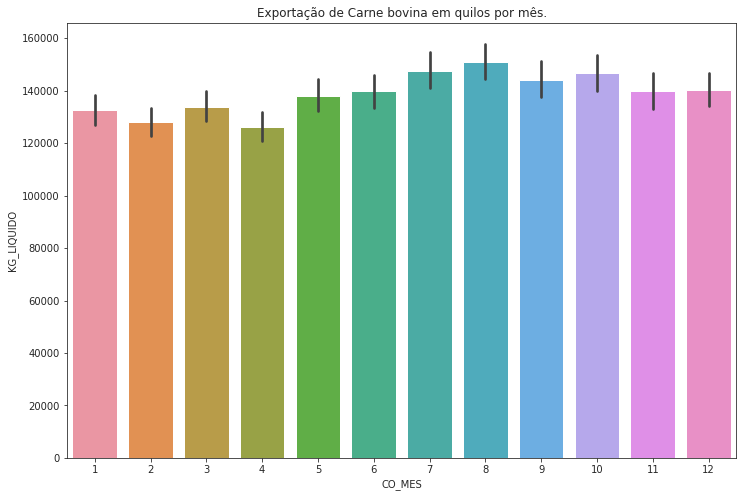

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
_ = sns.barplot(data=df_exportacoes, x='CO_MES', y='KG_LIQUIDO', ax=ax)
_ = ax.set_title('Exportação de Carne bovina em quilos por mês.')

Aparentemente o mês tem pouca influencia na exportação

In [18]:
df_exportacoes_por_pais = df_exportacoes[['NO_PAIS', 'KG_LIQUIDO']].groupby(['NO_PAIS']).sum().sort_values(by=['KG_LIQUIDO'], ascending=False)
df_exportacoes_por_pais.head(10)

,KG_LIQUIDO
NO_PAIS,
Rússia,3957575411
Egito,2475800678
Hong Kong,2303433128
China,1845410758
Irã,1414532158
Chile,1183743636
Venezuela,847585041
Itália,626913479
Arábia Saudita,606187950


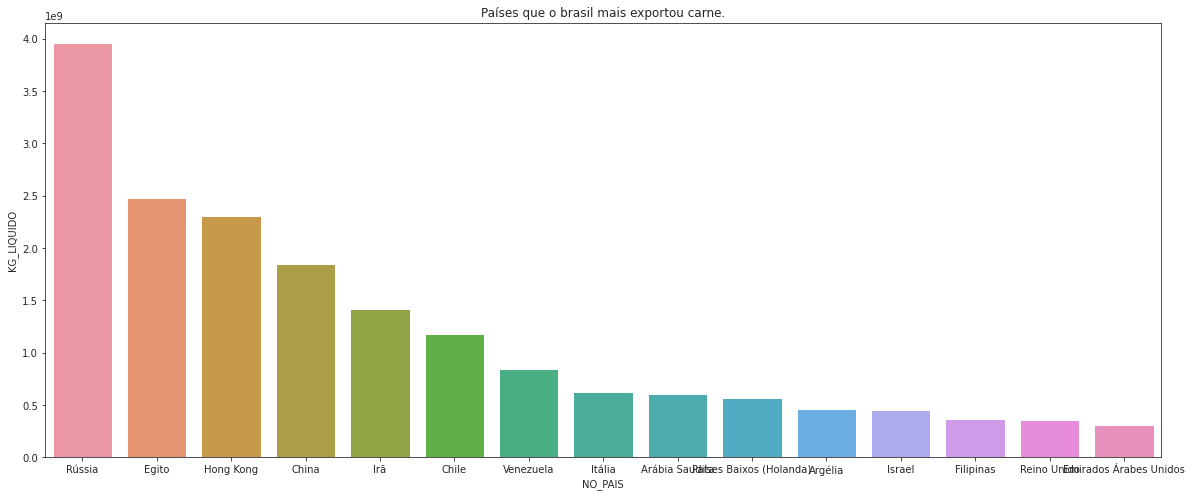

In [19]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(
    data=df_exportacoes_por_pais.head(15),
    x=df_exportacoes_por_pais.head(15).index, y='KG_LIQUIDO', ax=ax)
_ = ax.set_title('Países que o brasil mais exportou carne.')

# 3. Analise empresas

In [20]:
df_cnpjs['nm_cnae'].value_counts()

Criação de bovinos para corte     187127
Frigorífico - abate de bovinos      7204
Name: nm_cnae, dtype: int64

## 3.1 Analise da abertura de empresas de gado de corte e frigorificos

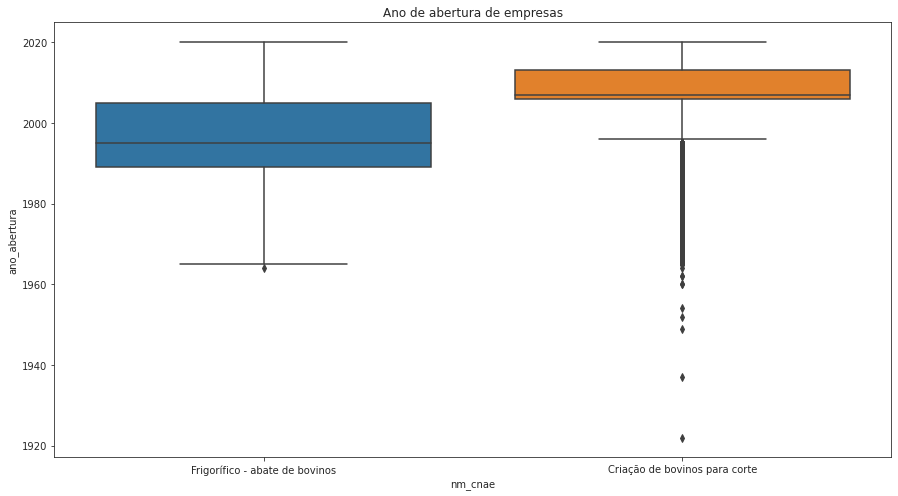

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
_ = sns.boxplot(data=df_cnpjs, x="nm_cnae", y="ano_abertura", ax=ax)
_ = ax.set_title('Ano de abertura de empresas')

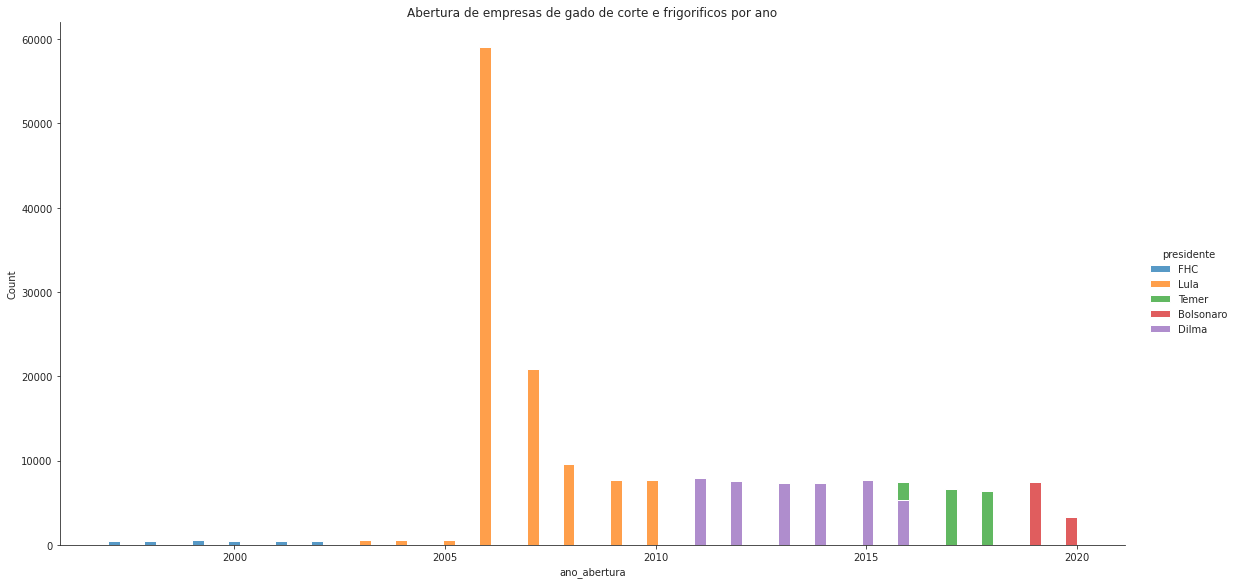

In [22]:
ax = sns.displot(data=df_cnpjs_abertura, x='ano_abertura', hue='presidente', multiple="stack", height=8, aspect=2)
_ = plt.title('Abertura de empresas de gado de corte e frigorificos por ano')

Ano de 2006 no governo Lula houve um alto número de abertura de empresas no ramo.

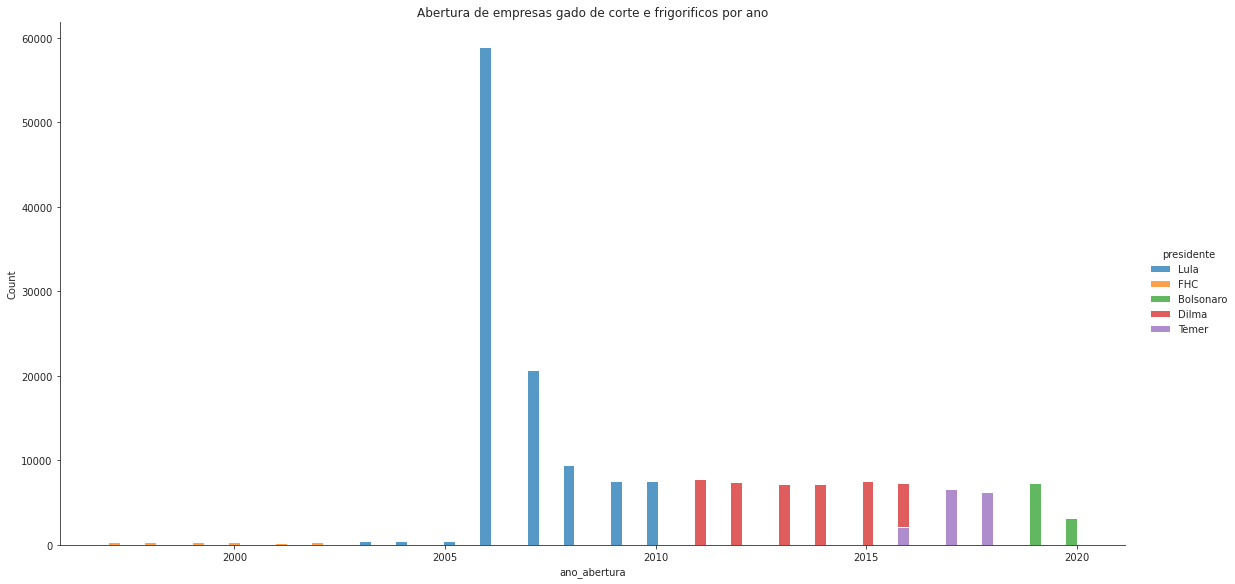

In [23]:
ax = sns.displot(data=df_cnpjs_abertura[df_cnpjs_abertura['cnae_fiscal'] == cod_bovino_corte], x='ano_abertura', hue='presidente', multiple="stack", height=8, aspect=2)
_ = plt.title('Abertura de empresas gado de corte e frigorificos por ano')

Um alto número de abertura de cnpjs de gado de corte no ano de 2006.

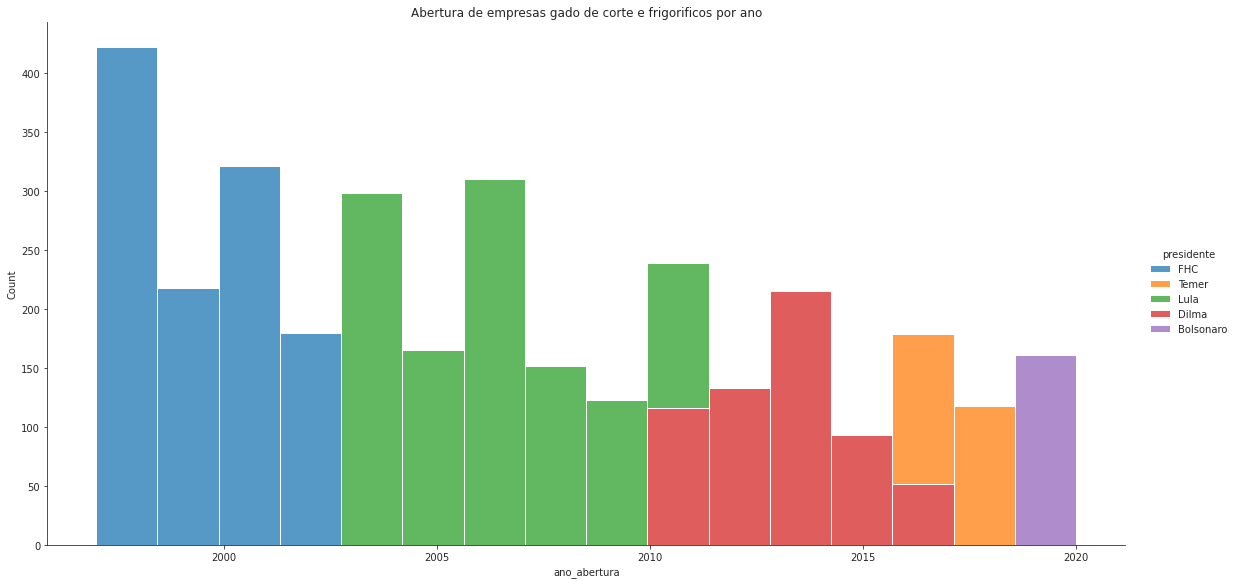

In [24]:
ax = sns.displot(data=df_cnpjs_abertura[df_cnpjs_abertura['cnae_fiscal'] == cod_bovino_frigorifico], x='ano_abertura', hue='presidente', multiple="stack", height=8, aspect=2)
_ = plt.title('Abertura de empresas gado de corte e frigorificos por ano')

O número de frigorificos abertos é maior no governo FHC. O que não segue a mesma tendência da abertura de cnpjs de gado de corte.

## 3.2 Analise de abertura e fechamento de empresas de gado de corte e frigorificos

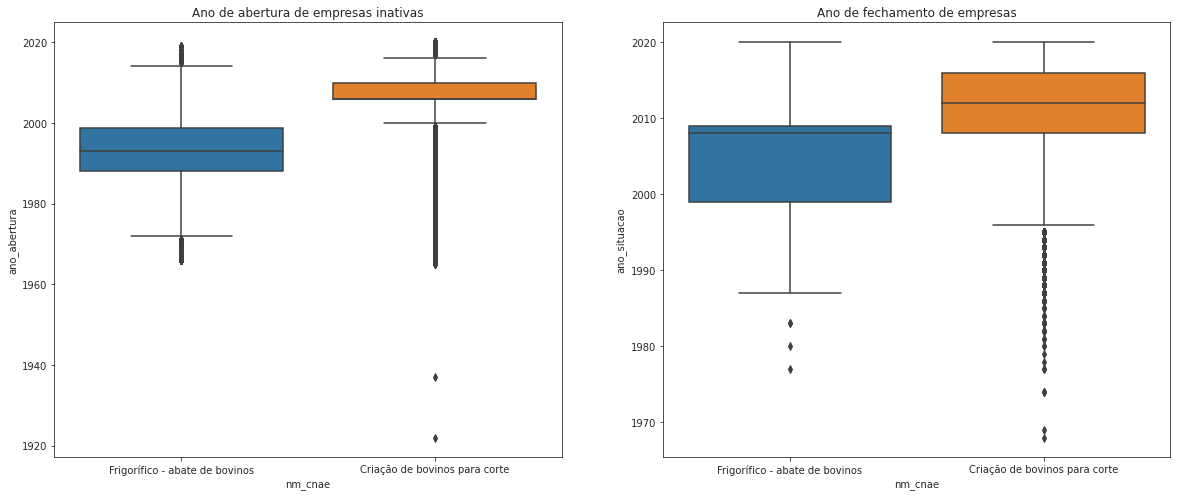

In [25]:
fig, axs = plt.subplots(1,2,figsize=(20,8))
_ = sns.boxplot(data=df_cnpjs_inativos, x="nm_cnae", y="ano_abertura", ax=axs[0])
_ = axs[0].set_title('Ano de abertura de empresas inativas')
_ = sns.boxplot(data=df_cnpjs_inativos, x="nm_cnae", y="ano_situacao", ax=axs[1])
_ = axs[1].set_title('Ano de fechamento de empresas')

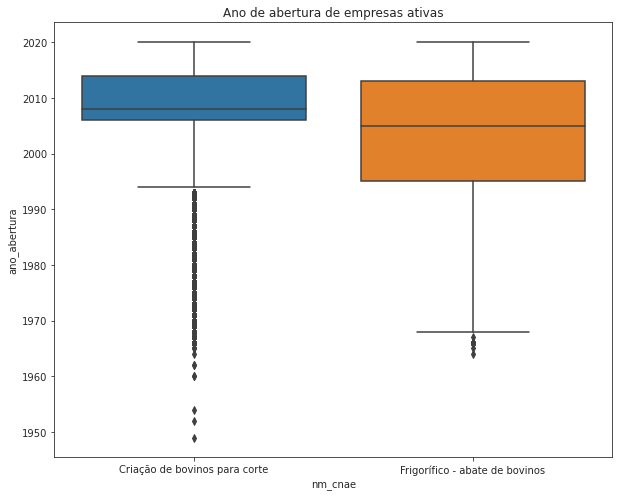

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.boxplot(data=df_cnpjs_ativos, x="nm_cnae", y="ano_abertura", ax=ax)
_ = ax.set_title('Ano de abertura de empresas ativas')

In [27]:
df_cnpjs_inativos_pres  = df_cnpjs_inativos[df_cnpjs_inativos['ano_situacao'] > 1996]
df_cnpjs_inativos_pres['presidente'] = df_cnpjs_inativos_pres.apply(lambda row: define_presidente(row['ano_situacao'], row['mes_abertura']), axis=1)
df_cnpjs_inativos_pres['presidente'].value_counts()

<ipython-input-27-11b585c29839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cnpjs_inativos_pres['presidente'] = df_cnpjs_inativos_pres.apply(lambda row: define_presidente(row['ano_situacao'], row['mes_abertura']), axis=1)


Dilma        14639
Lula         12666
Temer         6179
Bolsonaro     3969
FHC           2332
Name: presidente, dtype: int64

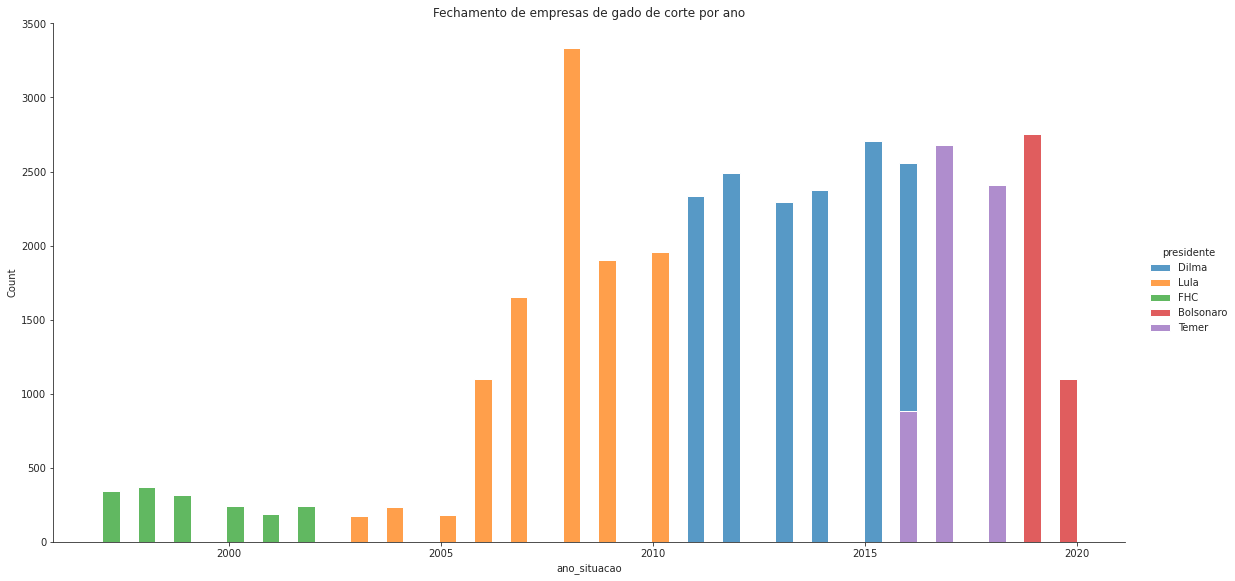

In [28]:
ax = sns.displot(data=df_cnpjs_inativos_pres[df_cnpjs_inativos_pres['cnae_fiscal'] == cod_bovino_corte], x='ano_situacao', hue='presidente', multiple="stack", height=8, aspect=2)
_ = plt.title('Fechamento de empresas de gado de corte por ano')

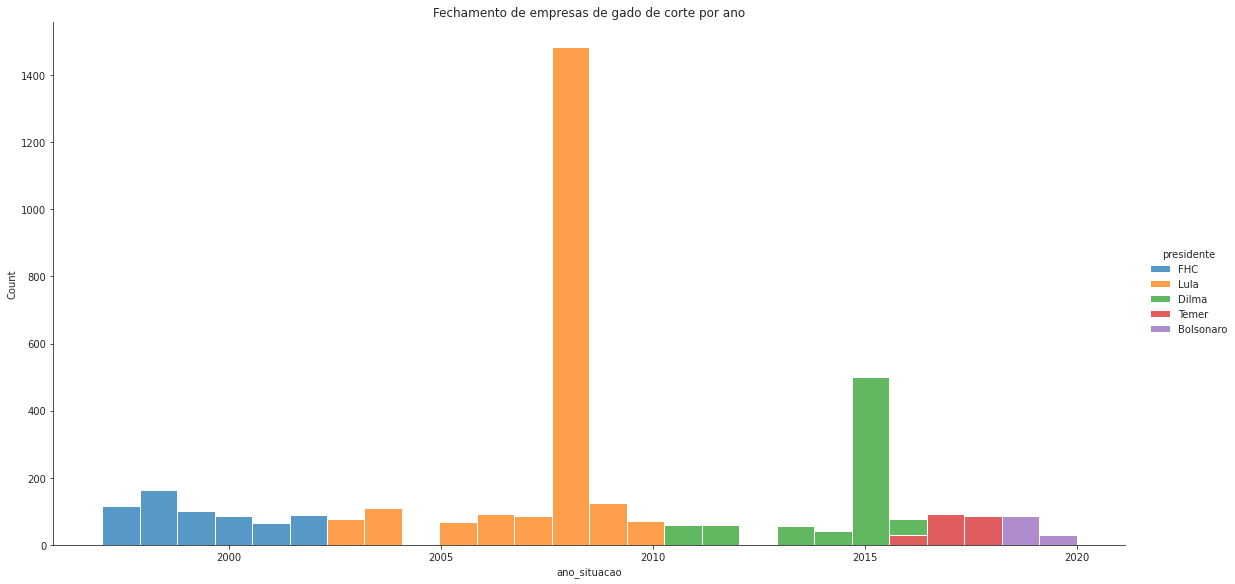

In [29]:
ax = sns.displot(data=df_cnpjs_inativos_pres[df_cnpjs_inativos_pres['cnae_fiscal'] == cod_bovino_frigorifico], x='ano_situacao', hue='presidente', multiple="stack", height=8, aspect=2)
_ = plt.title('Fechamento de empresas de gado de corte por ano')

Três anos depois do maior número de abertura de empresas de gado de corte, houve o maior número de desativamento de cnpjs tanto de gados de corte como de frigorificos.

As empresas de gado de corte continuaram com um grande numero de fechamentos.

Em 2015 houve um numero elevado tambem de fechamento de frigorificos

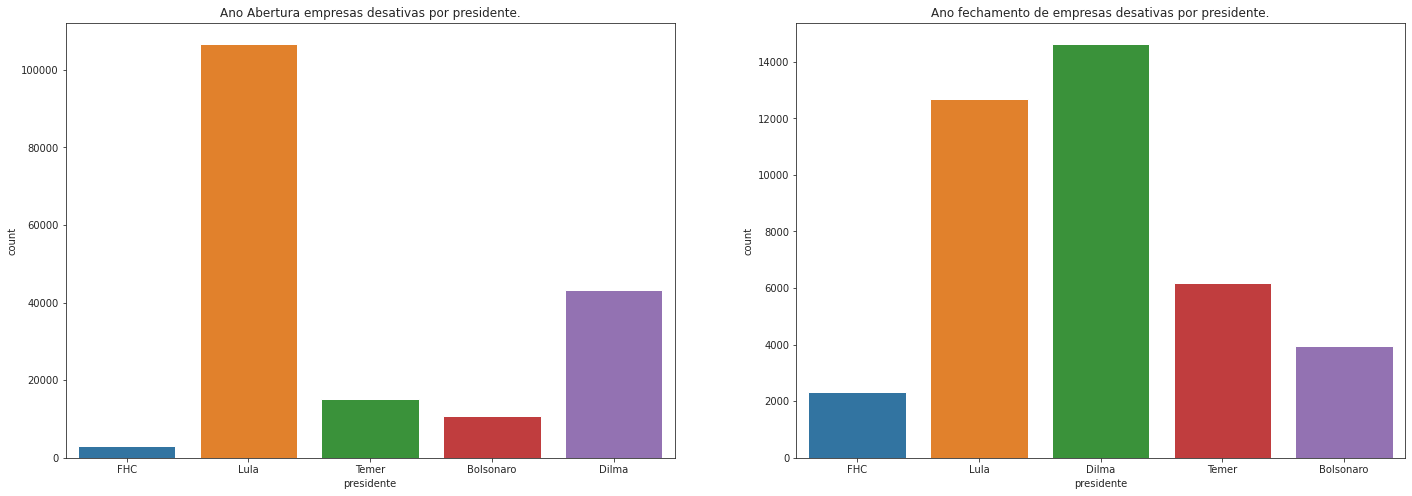

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(24,8))
_ = sns.countplot(data=df_cnpjs_abertura, x='presidente', ax=axs[0])
_ = axs[0].set_title('Ano Abertura empresas desativas por presidente.')
_ = sns.countplot(data=df_cnpjs_inativos_pres, x='presidente', ax=axs[1])
_ = axs[1].set_title('Ano fechamento de empresas desativas por presidente.')

Ao mesmo tempo em que tem um alto número de abertura de empresas no governo Lula tambem teve um alto número de fechamento. O governo Dilma abriu menos que a metade de empresas que o governo lula e fechou mais.

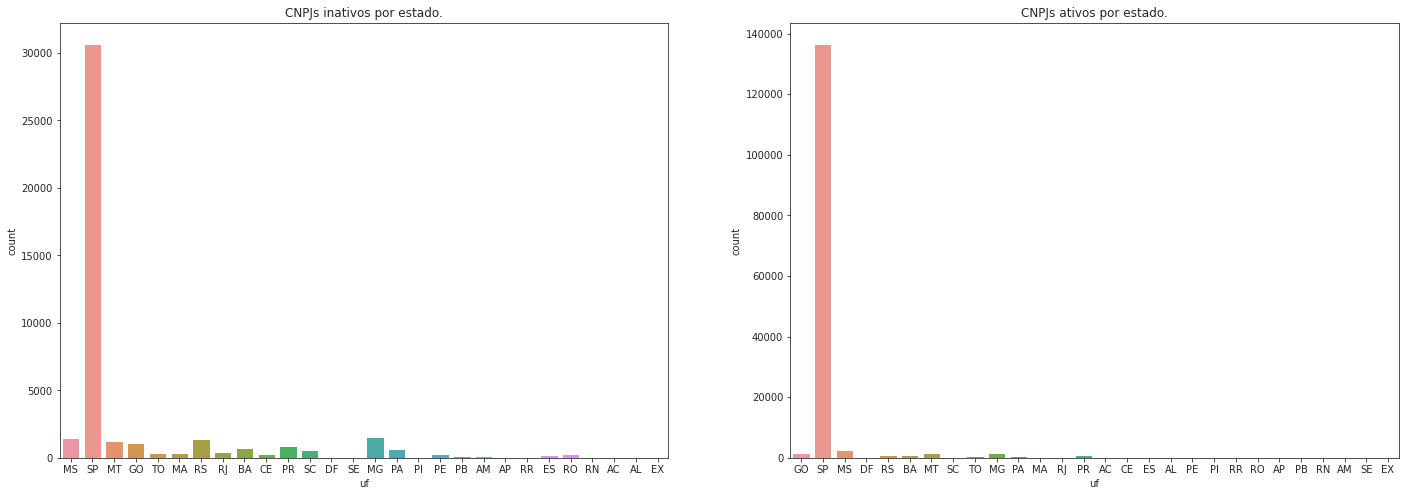

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(24,8))
_ = sns.countplot(data=df_cnpjs_inativos, x='uf', ax=axs[0])
_ = axs[0].set_title('CNPJs inativos por estado.')
_ = sns.countplot(data=df_cnpjs_ativos, x='uf', ax=axs[1])
_ = axs[1].set_title('CNPJs ativos por estado.')

# 3.3 Análise Capital Social

In [32]:
df_capital_social = df_cnpjs_ativos[['razao_social', 'capital_social_empresa', 'cnae_fiscal','nm_cnae']].sort_values(by=['capital_social_empresa'], ascending=False)
df_capital_social_corte = df_capital_social[df_capital_social['cnae_fiscal'] == cod_bovino_corte]
df_capital_social_frig = df_capital_social[df_capital_social['cnae_fiscal'] == cod_bovino_frigorifico]

In [33]:
capital_outros_corte = df_capital_social_corte.iloc[5:, :]['capital_social_empresa'].sum()
df_capital_outros_corte = pd.DataFrame(data={'razao_social': ['Outros'], 'capital_social_empresa': [capital_outros_corte]})
df_capital_outros_corte

,razao_social,capital_social_empresa
0,Outros,2.233383e+10


In [34]:
df_capital_plot = df_capital_social_corte.head()
df_capital_plot = pd.concat([df_capital_plot, df_capital_outros_corte])

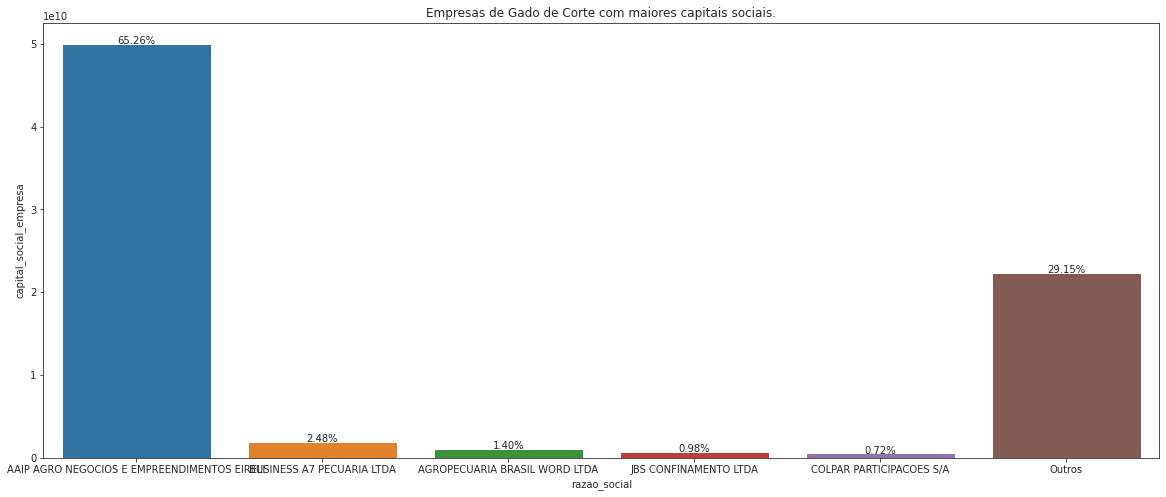

In [35]:
total = df_capital_social_corte['capital_social_empresa'].sum()
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(
    data=df_capital_plot,
    x='razao_social', y='capital_social_empresa', ax=ax)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
_ = ax.set_title('Empresas de Gado de Corte com maiores capitais sociais.')


O capital social da AAIP é maior que a soma de todos os outros capitais de empresas de gado de corte

In [36]:
capital_outros_frig = df_capital_social_frig.iloc[5:, :]['capital_social_empresa'].sum()
df_capital_outros_frig = pd.DataFrame(data={'razao_social': ['Outros'], 'capital_social_empresa': [capital_outros_frig]})
df_capital_outros_frig

,razao_social,capital_social_empresa
0,Outros,1.810662e+09


In [37]:
df_capital_plot = df_capital_social_frig.head()
df_capital_plot = pd.concat([df_capital_plot, df_capital_outros_frig])

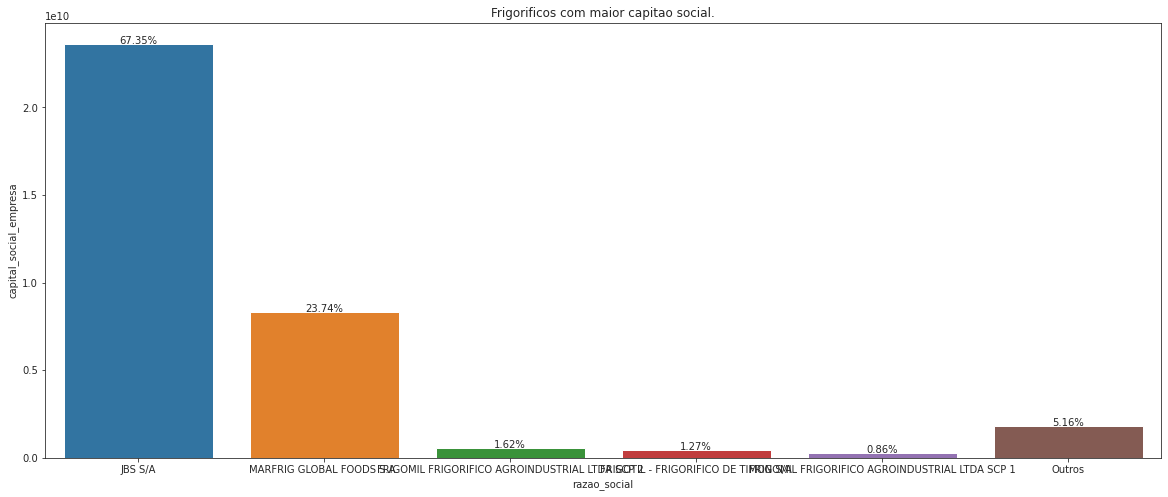

In [38]:
total = df_capital_social_frig['capital_social_empresa'].sum()
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(
    data=df_capital_plot,
    x='razao_social', y='capital_social_empresa', ax=ax)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
_ = ax.set_title('Frigorificos com maior capitao social.')


O capital social da JBS é maior que a soma de todos os capitais sociais dos outros frigoríficos.

In [39]:
capital_social_por_estado = df_cnpjs_ativos[['uf', 'capital_social_empresa']].groupby(['uf']).sum()
capital_social_por_estado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, AC to TO
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capital_social_empresa  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0+ bytes


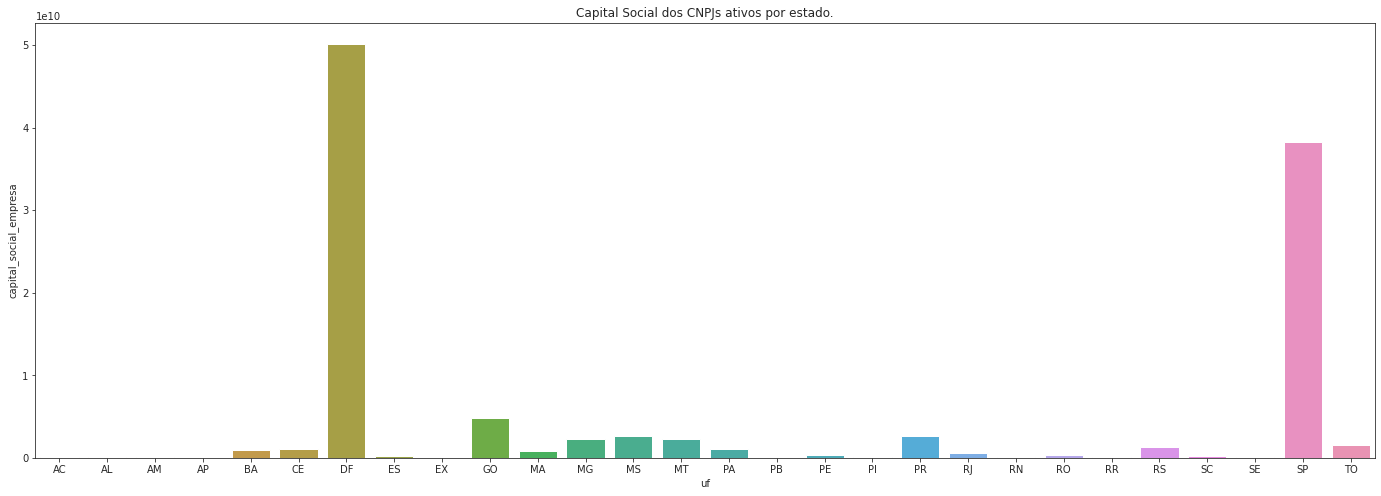

In [40]:
fig, ax = plt.subplots(figsize=(24,8))
_ = sns.barplot(data=capital_social_por_estado, x=capital_social_por_estado.index, y='capital_social_empresa', ax=ax)
_ = ax.set_title('Capital Social dos CNPJs ativos por estado.')

# Conclusões

A exportação de carne bovina deu uma alavancada muito grande em 2006 no governo Lula em quantidade estremamente alta, depois houveram cnpjs fechados em um numero maior,
mas as exportações diminuiram menos. No governo Temer as exportações voltaram a subir e no governo Bolsonaro foi o recorde de exportação de carne bovina em 2019.

O aumento de numero de empresas no ramo de gado de corte não foi acompanhado pelo de frigorificos, uma explicação seria o cresimentos dos frigorificos presentes como a JBS.

Como tem uma diferença enorme dos capitais sociais das empresas, os estados que acumulam mais capital social são os que estão as sedes das maiores empresas.
